# Exercise SKLearn SVR(Support Vector Regression) with Grid Search Technique


In [1]:
# Import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [2]:
# Load a dataset from a CSV file
df = pd.read_csv("../../../data/Salary_Data.csv")

In [3]:
# Check the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
# Separate the attribute and the label from the dataframe
X = df["YearsExperience"]
y = df["Salary"]

In [5]:
# Convert the list X into numpy array
X = np.array(X)

# Reshape the array X to have a single column and as many rows as necessary
X = X[:, np.newaxis]

# Intermezo: [:, np.newaxis] means "for all elements in `X` array, add a new axis"

In [7]:
# Create an instance of the Support Vector Regression (SVR) model
model = SVR()

# Define the parameters for the SVR model
parameters = {
    "kernel": ["rbf"],  # The kernel type to be used in the algorithm
    "C": [1000, 10000, 100000],  # The regularization parameter
    "gamma": [0.5, 0.05, 0.005],  # The kernel coefficient for 'rbf'
}

# Create an instance of GridSearchCV, which will search over specified parameter values
# for an estimator (the SVR model in this case)
grid_search = GridSearchCV(model, parameters)

# Fit the model to the data, using the grid search to find the best parameters
grid_search.fit(X, y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [8]:
# Show the best parameter from the grid search
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [11]:
# Create a new instance of the SVR model with specific parameters
new_model = SVR(C=100000, gamma=0.005, kernel="rbf")

# Fit the new SVR model to the data
new_model.fit(X, y)

SVR(C=100000, gamma=0.005)

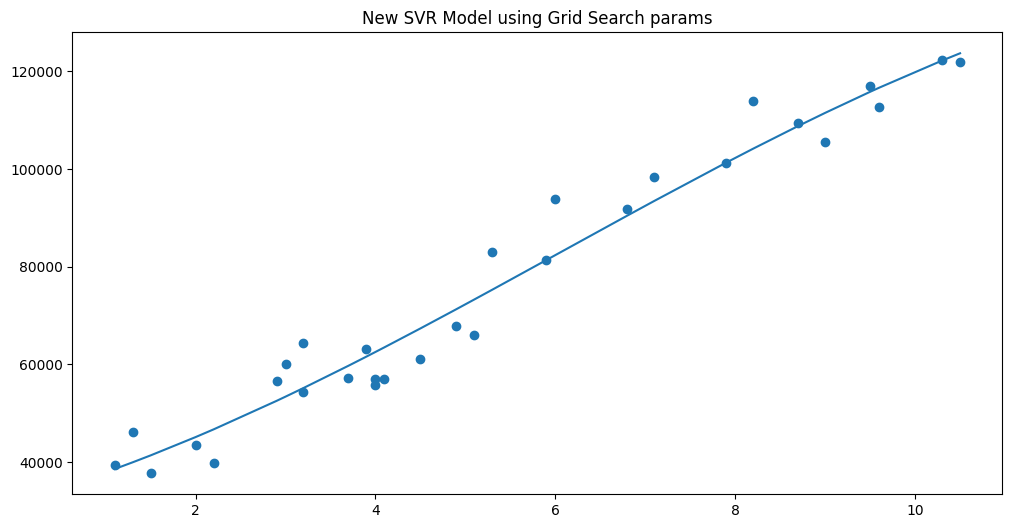

In [12]:
# Create a new figure with a specific size
plt.figure(figsize=(12, 6))

# Set the title of the figure
plt.title("New SVR Model using Grid Search params")

# Create a scatter plot of the data points
plt.scatter(X, y)

# Create a line plot of the predictions from the new SVR model
plt.plot(X, new_model.predict(X))

# Display the figure
plt.show()